In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
# print(adult.metadata)

# variable information
# print(adult.variables)

In [10]:
X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [11]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"https://github.com/datasciencedojo/datasets/blob/master/titanic.csv?raw=true"
)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# EOD
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
df["Age"].skew()

np.float64(0.38910778230082704)

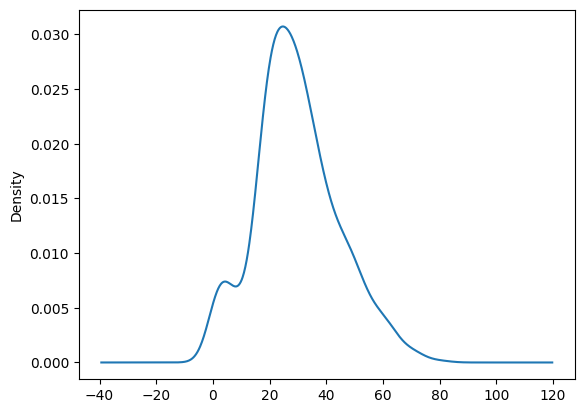

In [25]:
df["Age"].plot(kind="kde")
plt.show()

In [21]:
from scipy.stats import probplot

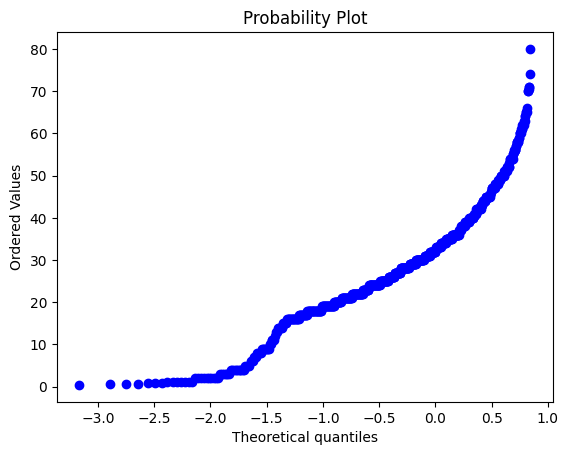

In [23]:
probplot(df["Age"], plot=plt)
plt.show()

In [24]:
# End Of the Distribution

In [26]:
mu = df["Age"].mean()
sigma = df["Age"].std()

In [30]:
mu, sigma

(np.float64(29.69911764705882), np.float64(14.526497332334042))

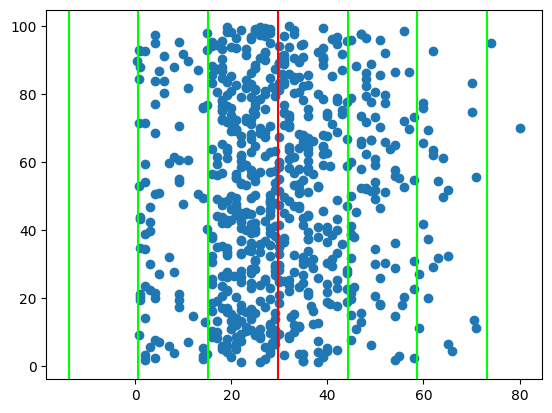

In [45]:
plt.scatter(x=df["Age"].dropna(), y=idx)
plt.axvline(mu, color="red")
plt.axvline(mu + sigma, color="lime")
plt.axvline(mu + 2 * sigma, color="lime")
plt.axvline(mu + 3 * sigma, color="lime")
plt.axvline(mu - sigma, color="lime")
plt.axvline(mu - 2 * sigma, color="lime")
plt.axvline(mu - 3 * sigma, color="lime")

In [46]:
upper = mu + 3 * sigma
lower = mu - 3 * sigma

In [48]:
upper

np.float64(73.27860964406094)

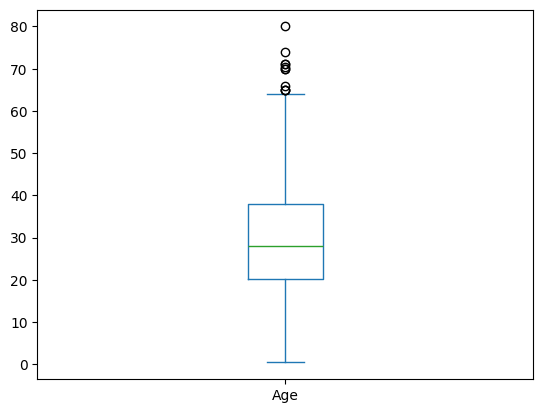

In [53]:
df["Age"].plot(kind="box")
plt.show()

In [55]:
from sklearn.impute import SimpleImputer

sc = SimpleImputer(strategy="constant", fill_value=upper)

In [56]:
sc

SimpleImputer(fill_value=np.float64(73.27860964406094), strategy='constant')

In [62]:
df["Age_New"] = sc.fit_transform(df[["Age"]])

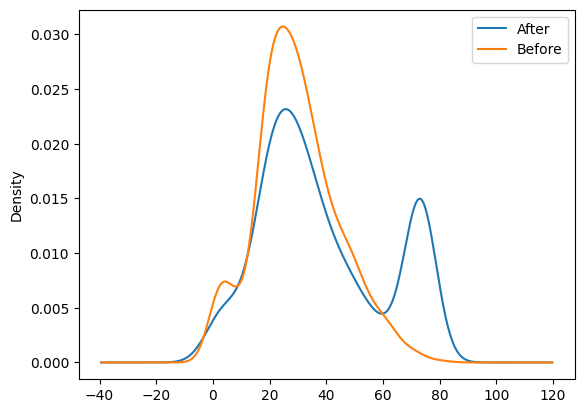

In [69]:
df["Age_New"].plot(kind="kde", label="After")
df["Age"].plot(kind="kde", label="Before")
plt.legend()
plt.show()

In [71]:
df["Age_New"].skew()

np.float64(0.4413775888233742)

<Axes: >

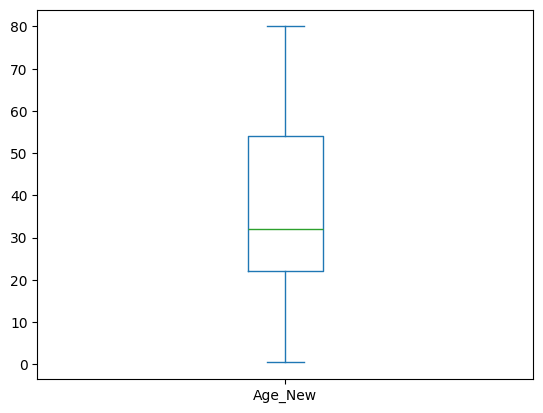

In [72]:
df["Age_New"].plot(kind="box")

In [73]:
# Can't be Considered

In [77]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

In [79]:
iqr = q3 - q1

In [81]:
iqr

np.float64(17.875)

In [82]:
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

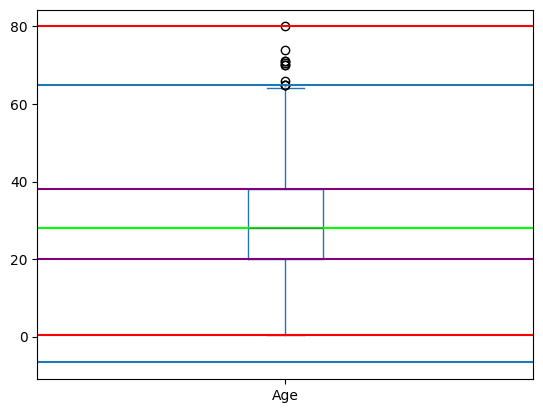

In [90]:
df["Age"].plot(kind="box")
plt.axhline(upper)
plt.axhline(lower)
plt.axhline(df["Age"].quantile(1), color="red")
plt.axhline(df["Age"].quantile(0), color="red")
plt.axhline(q3, color="purple")
plt.axhline(q1, color="purple")
plt.axhline(df["Age"].quantile(0.5), color="lime")

In [91]:
upper

np.float64(64.8125)

In [92]:
sc2 = SimpleImputer(strategy="constant", fill_value=upper)

In [93]:
sc2

SimpleImputer(fill_value=np.float64(64.8125), strategy='constant')

In [96]:
df["Age_IQR"] = sc2.fit_transform(df["Age"].values.reshape(-1, 1))

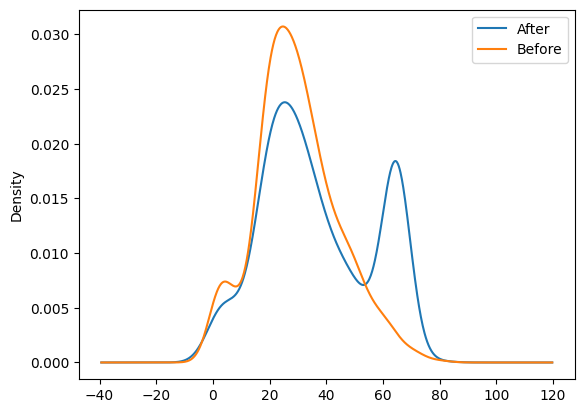

In [99]:
df["Age_IQR"].plot(kind="kde", label="After")
df["Age"].plot(kind="kde", label="Before")
plt.legend()
plt.show()

<Axes: >

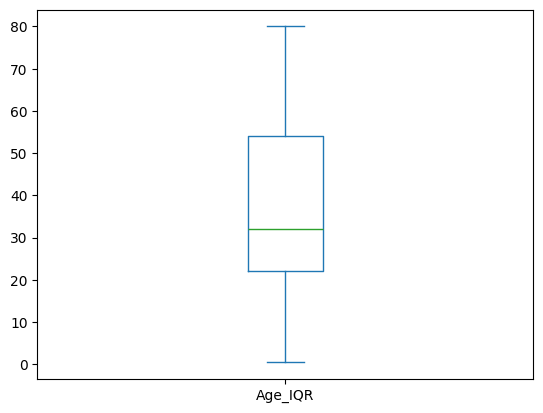

In [100]:
df["Age_IQR"].plot(kind="box")

In [101]:
# Can't be considered

In [103]:
# Multivariate
# KNN Imputer

In [104]:
# Univariate Imputation

# Mean Median Mode
# EOD
# CCA
# Arbitary Value Imputation (Consntant Not Availaible)

In [105]:
# Multivariate Imputation

In [106]:
# KNN Imputation